In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from lib import get_filepath, get_thermodinamic_df, get_pressure

In [2]:
temperatures = tuple(range(100, 1000 + 1, 100))
volumes = tuple(range(10**6, 9 * 10**6 + 1, 10**6))
pressures = {}
sufix = '__termodinamica'
for temperature in temperatures:
  pressures[temperature] = []
  for volume in volumes:
    filepath = get_filepath(temperature, volume, sufix)
    thermodinamic_df = get_thermodinamic_df(filepath)
    pressure = get_pressure(thermodinamic_df)
    pressures[temperature].append(pressure)

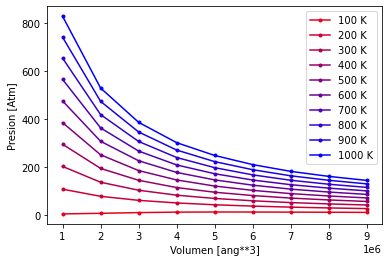

In [3]:
fig, ax = plt.subplots()
ax.set(xlabel = 'Volumen [ang**3]', ylabel='Presion [Atm]')
for temperature in temperatures:
  rgb_tuple = (
    1 - temperature / max(temperatures), 0, temperature / max(temperatures)
  )
  ax.plot(
    volumes,
    pressures[temperature],
    marker='o',
    markersize=3,
    color=rgb_tuple,
    label=f'{temperature} K'
  )

ax.legend()

fig.savefig('../dat/isothermicVolumeAndPressure.png')